In [1]:
import numpy as np
import tensorflow as tf
import seaborn as sns
import random
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


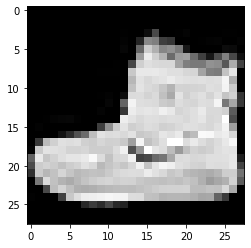

In [4]:
plt.imshow(x_train[0], cmap = 'gray')

In [8]:
x_train.shape

(60000, 28, 28)

In [9]:
x_test.shape

(10000, 28, 28)

In [10]:
y_train.shape

(60000,)

In [11]:
y_test.shape

(10000,)

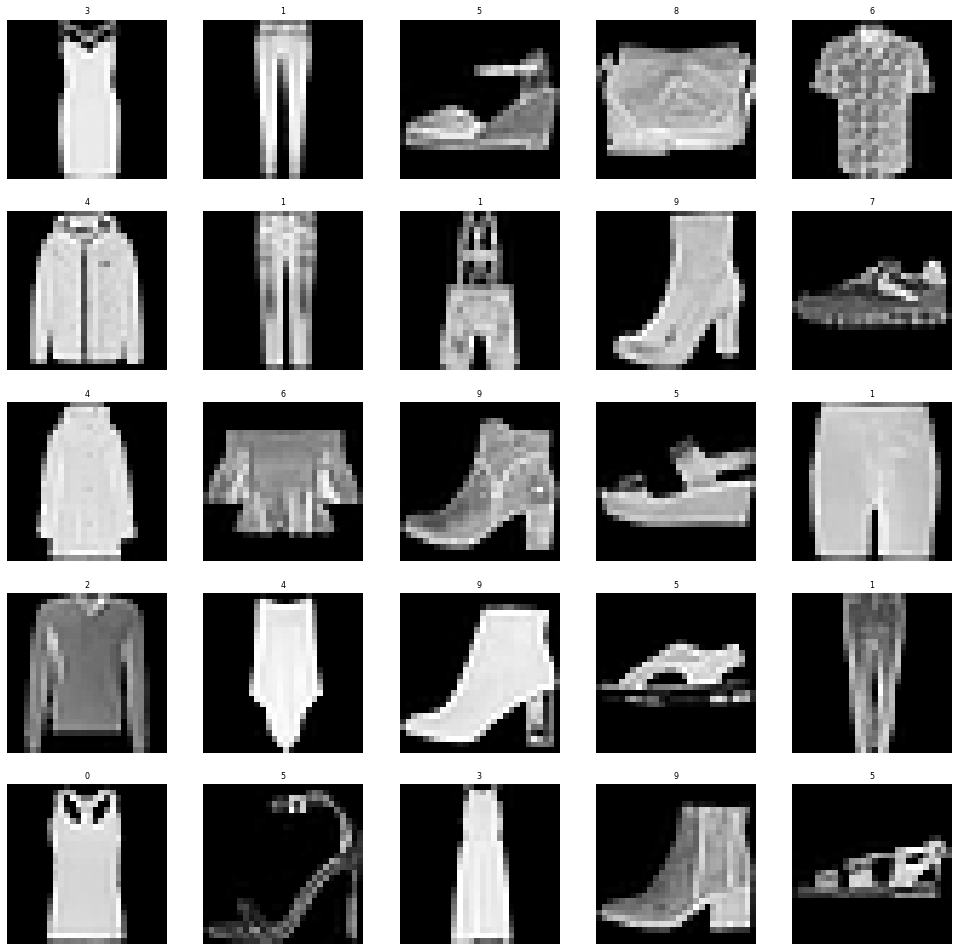

In [18]:
w_grid = 5
l_grid = 5
fig, axes = plt.subplots(l_grid, w_grid, figsize = (17, 17))
axes = axes.ravel()
x_train_len = len(x_train)

for i in np.arange(w_grid * l_grid):
    index = np.random.randint(0, x_train_len)
    axes[i].imshow(x_train[index], cmap = "gray")
    axes[i].set_title(y_train[index], fontsize = 8)
    axes[i].axis('off')

In [23]:
x_train = x_train / 255

In [27]:
x_test = x_test / 255

In [44]:
noise_factor = 0.3

noise_data_train = []

for img in x_train:
    nimg = img + noise_factor * np.random.randn (*img.shape)
    nimg = np.clip(nimg, 0, 1)
    noise_data_train.append(nimg)
    
ndtrain = np.array(noise_data_train)

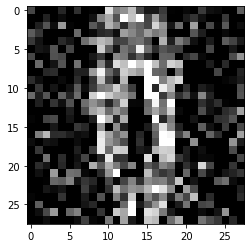

In [45]:
plt.imshow(noise_data_train[np.random.randint(x_train_len)], cmap = 'gray')

In [46]:
noise_factor = 0.2

noise_data_test = []

for img in x_test:
    nimg = img + noise_factor * np.random.randn (*img.shape)
    nimg = np.clip(nimg, 0, 1)
    noise_data_test.append(nimg)
    
ndtest = np.array(noise_data_test)

In [53]:
autoencoder = tf.keras.models.Sequential()

#Encoder
autoencoder.add(tf.keras.layers.Conv2D(filters = 16, kernel_size = 3, strides = 2, padding = 'same', input_shape = (28, 28, 1)))
autoencoder.add(tf.keras.layers.Conv2D(filters = 8, kernel_size = 3, strides = 2, padding = 'same'))

#Center
autoencoder.add(tf.keras.layers.Conv2D(filters = 8, kernel_size = 3, strides = 1, padding = 'same'))

#Decoder
autoencoder.add(tf.keras.layers.Conv2DTranspose(filters = 16, kernel_size = 3, strides = 2, padding = 'same'))
autoencoder.add(tf.keras.layers.Conv2DTranspose(filters = 1, kernel_size = 3, strides = 2, activation = 'sigmoid', padding = 'same'))                

In [54]:
autoencoder.compile(loss = 'binary_crossentropy', optimizer = tf.keras.optimizers.Adam(lr = 0.001))
autoencoder.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 14, 14, 16)        160       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 8)           1160      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 14, 14, 16)        1168      
_________________________________________________________________
conv2d_transpose_3 (Conv2DTr (None, 28, 28, 1)         145       
Total params: 3,217
Trainable params: 3,217
Non-trainable params: 0
_________________________________________________________________


In [55]:
autoencoder.fit(ndtrain.reshape(-1, 28, 28, 1), x_train.reshape(-1, 28, 28, 1), epochs = 10, batch_size = 200, validation_data = (ndtest.reshape(-1, 28, 28, 1), x_test.reshape(-1, 28, 28, 1)))


Epoch 1/10
300/300 [==============================] - 30s 99ms/step - loss: 0.3959 - val_loss: 0.3229
Epoch 2/10
300/300 [==============================] - 28s 93ms/step - loss: 0.3182 - val_loss: 0.3092
Epoch 3/10
300/300 [==============================] - 26s 86ms/step - loss: 0.3106 - val_loss: 0.3032
Epoch 4/10
300/300 [==============================] - 26s 86ms/step - loss: 0.3068 - val_loss: 0.3002
Epoch 5/10
300/300 [==============================] - 26s 87ms/step - loss: 0.3047 - val_loss: 0.2987
Epoch 6/10
300/300 [==============================] - 26s 87ms/step - loss: 0.3034 - val_loss: 0.2964
Epoch 7/10
300/300 [==============================] - 26s 88ms/step - loss: 0.3025 - val_loss: 0.2959
Epoch 8/10
300/300 [==============================] - 26s 88ms/step - loss: 0.3018 - val_loss: 0.2948
Epoch 9/10
300/300 [==============================] - 27s 90ms/step - loss: 0.3013 - val_loss: 0.2947 0s - 
Epoch 10/10
300/300 [==============================] - 26s 88ms/step - loss:

In [57]:
evaluation = autoencoder.evaluate(ndtest.reshape(-1, 28, 28, 1), x_test.reshape(-1, 28, 28, 1))
print("Test Loss: ", round(evaluation, 3))

313/313 [==============================] - 4s 12ms/step - loss: 0.2942
Test Loss:  0.294


In [58]:
predicted = autoencoder.predict(ndtest[:10].reshape(-1, 28, 28, 1))

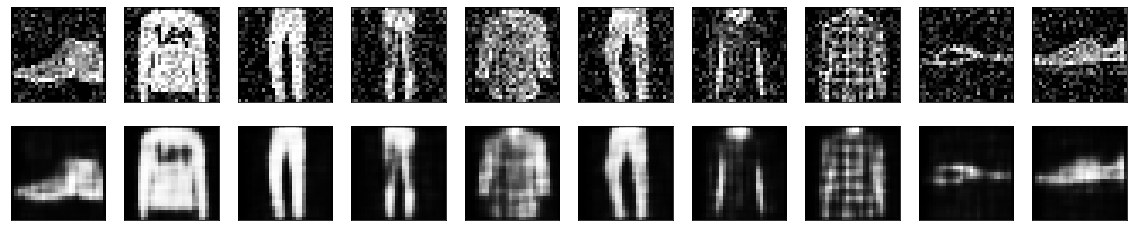

In [60]:
fig, axes = plt.subplots(nrows = 2, ncols = 10, sharex = True, sharey = True, figsize = (20, 4))
for images, row in zip([ndtest[:10], predicted], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap = 'gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)